# Homework 4: Data Visualization
- **Name**:  DOPPALAPUDI MADHUKAR
- **UB Username**: mdoppala
- **UB Person Number**:  5054 4966

##
 Problem 1 - Scatter Plot with a *Line*

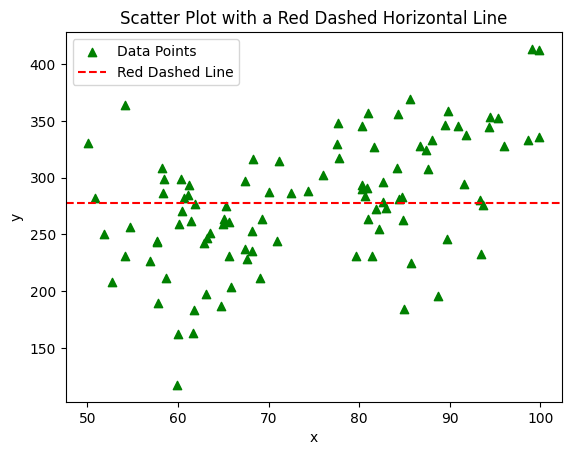

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from a CSV file and store it in a DataFrame
data = pd.read_csv('scatter_data.csv')

# Clean up the column names to remove any extra spaces
data.columns = data.columns.str.strip()

# Rename specific columns for clarity, changing '% x' to 'x' and ' y ' to 'y'
data = data.rename(columns={'% x': 'x', ' y ': 'y'})

# Create a scatter plot with green triangle markers for our data points
plt.scatter(data['x'], data['y'], marker='^', color='green', label='Data Points')

# Add a red dashed horizontal line at the mean of the 'y' values to visualize the average
plt.axhline(y=data['y'].mean(), linestyle='--', color='red', label='Red Dashed Line')

# Set the title and labels for our plot
plt.title('Scatter Plot with a Red Dashed Horizontal Line')
plt.xlabel('x')
plt.ylabel('y')

# Display a legend to distinguish between data points and the red dashed line
plt.legend()

# Show our plot to visualize the data
plt.show()


## Problem 2 - Histogram

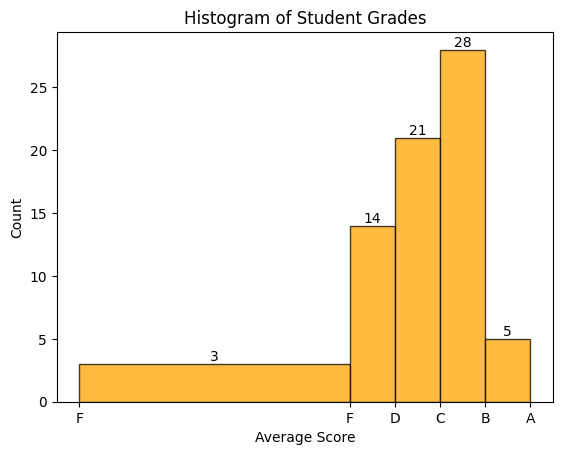

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load student grades data from a CSV file
student_data = pd.read_csv('student_grades.csv')

# Rename columns for clarity - "studentID" and "avgScore"
student_data.columns = ["Student ID", "Average Score"]

# Ensure that the "Average Score" column contains numeric values, handling any errors
student_data["Average Score"] = pd.to_numeric(student_data["Average Score"], errors="coerce")

# Define grade ranges and labels
grade_ranges = [0, 60, 70, 80, 90, 100]
grade_labels = ["F", "D", "C", "B", "A"]

# Define the bin edges for the histogram
bins = [0, 60, 70, 80, 90, 100]

# Compute histogram counts and bin edges using NumPy
counts, bin_edges = np.histogram(student_data['Average Score'], bins=bins)

# Create a histogram plot with specified bins, edge color, and color
plt.hist(student_data['Average Score'], bins=bins, edgecolor='black', color='orange', alpha=0.75)

# Add labels to each bar of the histogram, displaying the count
for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, count, str(int(count)), ha='center', va='bottom')

# Customize the x-axis ticks to display grade labels
plt.xticks(bins, ['F','F', 'D', 'C', 'B', 'A'])

# Set labels for the x and y axes
plt.xlabel('Average Score')
plt.ylabel('Count')

# Set the title of the histogram
plt.title('Histogram of Student Grades')

# Display the histogram plot
plt.show()


## Problem 3 - Barplot and Boxplot in the Same Figure

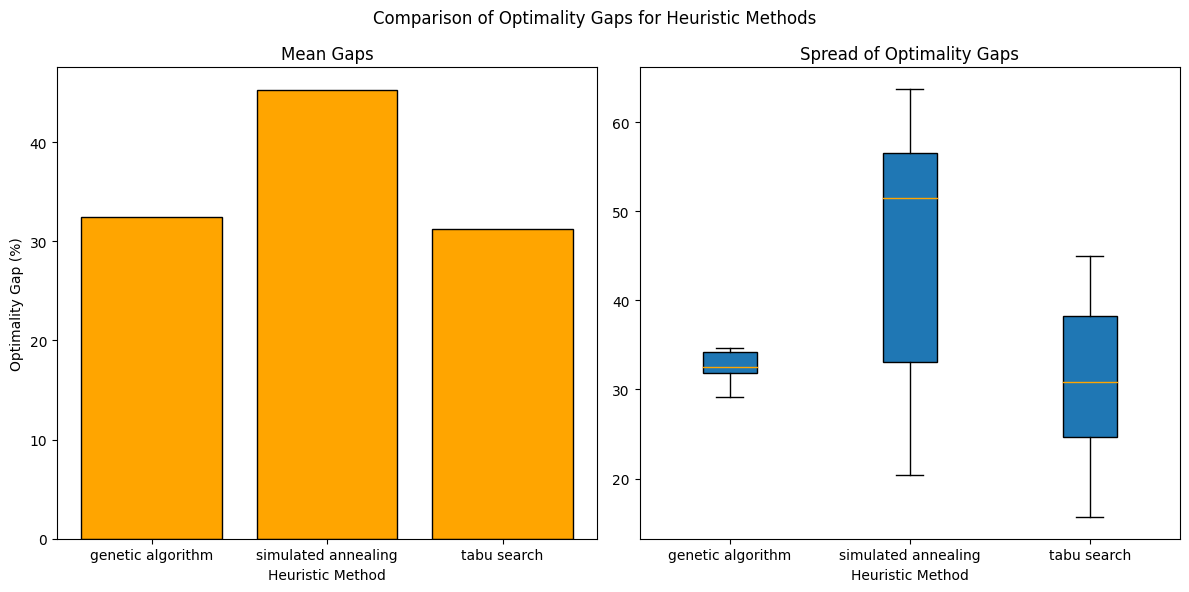

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file, excluding lines starting with "%", and without header
data = pd.read_csv("solution_data.csv", comment="%", header=None)

# Assign column names for clarity
data.columns = ["Problem", "Solution Method", "Value"]

# Calculate the mean of optimal solution values for each problem
optimal_values = data[data['Solution Method'] == 'optimal'].groupby('Problem')['Value'].mean()

# Calculate the mean solution values for heuristic methods for each problem and method
heuristic_values = data[data['Solution Method'] != 'optimal'].groupby(['Problem', 'Solution Method'])['Value'].mean()

# Calculate the optimality gaps as a percentage
optimality_gaps = (optimal_values - heuristic_values) / optimal_values * 100

# Reset the index for further use
optimality_gaps = optimality_gaps.reset_index()

# Create a DataFrame for bar plotting
barplot_data = pd.DataFrame({
    'Heuristic Method': optimality_gaps['Solution Method'],
    'Optimality Gap (%)': optimality_gaps['Value']
})

# Further reset the index
optimality_gaps = optimality_gaps.reset_index()

# Calculate the average gaps for specific heuristic methods
average_gaps = barplot_data[barplot_data['Heuristic Method'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic Method')['Optimality Gap (%)'].mean().reset_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set the overall title for the figure
fig.suptitle("Comparison of Optimality Gaps for Heuristic Methods")

# Plot a bar chart for mean gaps
axes[0].bar(average_gaps['Heuristic Method'], average_gaps['Optimality Gap (%)'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")

# Create a list of data for box plotting
data_boxplot = [optimality_gaps[optimality_gaps['Solution Method'] == method]['Value'] for method in optimality_gaps['Solution Method'].unique()]

# Plot a boxplot for the spread of optimality gaps
bp = axes[1].boxplot(data_boxplot, labels=optimality_gaps['Solution Method'].unique(), patch_artist=True, medianprops={'color': 'orange'})

# Customize labels and positions for x-axis ticks
custom_labels = optimality_gaps['Solution Method'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Spread of Optimality Gaps")

# Ensure tight layout for the subplots
plt.tight_layout()

# Display the entire figure
plt.show()
